## Project Description
This project involves the use of NumPy, Pandas, MatPlotlib, and Python to analyze <a href="./titanic_data.csv"> Titanic</a> dataset. It also shows how to conduct data analysis process by:
1- Defining the Question you want to answer by analyzing the data<br/>
2- Data Wrangling: investigate the data and clean it<br/>
3- Data Exploration: build intuition  about the data and find patterns <br/>
4- Drawing conclusion: make predictions based on the done analysis<br/>
5- Communicate the findings <br/>

##  Questions to answer about Titanic data set:
- What factors made people more likely to survive?
- Were men more likely to survive than women?
- What is the common age for survived people?




## Data wrangling phase 

In [2]:
# First: Load the data into appropriate data structure
import numpy as np
import pandas as pd
titanic_df = pd.read_csv('titanic_data.csv')
#------------------------------------------------------------------------------------
#Second: Investigate the data and define the problems with it 
##let's start by checking each varible values and thinking about its valid values 
##By using the count function, We can see th 

total_rows_count = titanic_df.shape[0] # Total data rows count
#print total_rows_count
print "________________Cloumns Values Count_______________"
print titanic_df.count() # Count function excludes the NAN values
print "_________________________________________________"

________________Cloumns Values Count_______________
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64
_________________________________________________


In [3]:
### At the begining, let's delete all columns that we are not interested in our analysis
#### Columns to be deleted are: Embarked, Name, and Ticket.
titanic_df.drop(['Name', 'Embarked','Ticket'], axis=1, inplace=True)
print titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            714
SibSp          891
Parch          891
Fare           891
Cabin          204
dtype: int64


## Problems with data: 
- Cabin: is missing for 77% of  passengers data, So I will exclude it from the data
- Age: is missing for 20% of passengers, I can't assume they have 0 years as age so I will exclude all passenger with unknown age from my data

## Suggested Solution:
I chose to omit all passengers with missing field values. This choice have some pros & cons: 
- Pros:
    - The data will be consistent, no hidden assumptions, and less problems with data calculations.  
- Cons:
    - Removing some entities from the data may mislead the analysis we are doing. For example, age is missing for 20% of pessengers and let's assume all of them were males, removing them might affect our conclusion and final findings about the data. Some data patterns may extremly change into the opposite direction because of data omitting. 


In [4]:
### Cabin: is missing for 77% of  passengers data, So I will exclude it from the data 
titanic_df.drop(['Cabin'],axis=1, inplace=True)
print titanic_df.iloc[0]

PassengerId       1
Survived          0
Pclass            3
Sex            male
Age              22
SibSp             1
Parch             0
Fare           7.25
Name: 0, dtype: object


In [5]:
### Age: is missing for 20% of pessengers, I can't assume they have 0 years as age so I will 
###      exclude all passenger with unknown age from my data
titanic_df = titanic_df[ np.isnan(titanic_df['Age']) != True]
for index, passenger in titanic_df.iterrows():
    if np.isnan(passenger['Age']) == True:
        print passenger
        print "____"
print titanic_df.count()
print titanic_df['Survived'].count()

PassengerId    714
Survived       714
Pclass         714
Sex            714
Age            714
SibSp          714
Parch          714
Fare           714
dtype: int64
714


Before we start answering the questions, let's explore different patterns in our data by showing the histograms for our variables:
- Dependent Variable is represented in 'Survived' column 
- independent Variables are represented in  'Sex', 'Pclass','Age',and 'Fare'


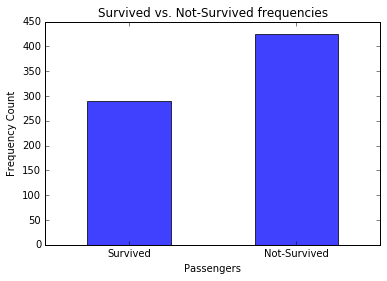

In [95]:
### Survived histogram 
### in our data sample, the below histogram shows that more passengers weren't survived 
%matplotlib inline
import matplotlib.pyplot as plt
def label_survival(row):
    if int(row['Survived']) == 1:
        return "Survived"
    else:
        return "Not-Survived"
    
titanic_df['Survival_Flag'] = titanic_df.apply(label_survival,axis=1)

#print titanic_df['Survived'].describe() 
Survival_counts = Counter(titanic_df['Survival_Flag'])
Survival_df = pd.DataFrame.from_dict(Survival_counts,orient='index')
Survival_plt= Survival_df.plot(kind='bar', title="Survived vs. Not-Survived frequencies",alpha=0.75, rot=0,legend=None)
plt.xlabel("Passengers")
plt.ylabel("Frequency Count")

Counter({'male': 453, 'female': 261})


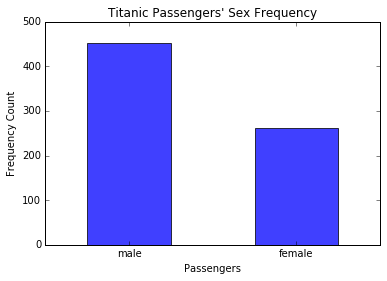

In [91]:
### Sex histogram 
#### As we see in the below histogram the males count is abount the double of the females count in
#### the sample data
from collections import Counter
#Count the sex occurence to plot the frequency 
sex_counts = Counter(titanic_df['Sex'])
print sex_counts
sex_df = pd.DataFrame.from_dict(sex_counts, orient='index')
sex_df.plot(kind='bar',title="Titanic Passengers' Sex Frequency", rot=0, alpha=0.75,legend=None )
plt.xlabel("Passengers")
plt.ylabel("Frequency Count")

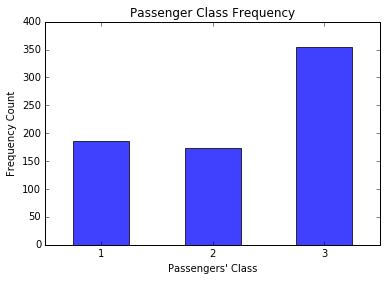

In [90]:
### Pclass histogram 
#### The below histogram shows that 3rd class passengers represents about the half of our data
pclass_counts = Counter(titanic_df['Pclass'])
pclass_df = pd.DataFrame.from_dict(pclass_counts,orient='index')
pclass_plt= pclass_df.plot(kind='bar', title="Passenger Class Frequency",alpha=0.75,rot=0, legend=None)
pclass_plt.set_xlabel("Passengers' Class")
pclass_plt.set_ylabel("Frequency Count")

In [68]:
### Fare histogram 
print ("______Passengers' Fare Statistics______________")
print titanic_df['Fare'].describe()


______Passengers' Fare Statistics______________
count    714.000000
mean      34.694514
std       52.918930
min        0.000000
25%        8.050000
50%       15.741700
75%       33.375000
max      512.329200
Name: Fare, dtype: float64


As the minimum fare value is 0.0, I think there might be something wrong here. I didn't expect to find passengers having 0 fare value, so let's see those passengers' info in the following block. I will not remove those passengers from my sample as they represents a part of the population.

In [69]:
for index, passenger in titanic_df.iterrows():
    if passenger['Fare'] == 0:
        print passenger
        print "----------------------------------------------"
for index, passenger in titanic_df.iterrows():
    if passenger['Fare'] >= 500.0:
        print passenger
        print "----------------------------------------------"

PassengerId               180
Survived                    0
Pclass                      3
Sex                      male
Age                        36
SibSp                       0
Parch                       0
Fare                        0
Survival_Flag    Not-Survived
Name: 179, dtype: object
----------------------------------------------
PassengerId               264
Survived                    0
Pclass                      1
Sex                      male
Age                        40
SibSp                       0
Parch                       0
Fare                        0
Survival_Flag    Not-Survived
Name: 263, dtype: object
----------------------------------------------
PassengerId           272
Survived                1
Pclass                  3
Sex                  male
Age                    25
SibSp                   0
Parch                   0
Fare                    0
Survival_Flag    Survived
Name: 271, dtype: object
----------------------------------------------
PassengerI

AS we see in the below histogram, the distribution is rightly skewed where the mean is less than 50. Passengers
withfare's value greater than $400 will not be omitted. Because, they represent 1st class passengers info that 
we want to explore.


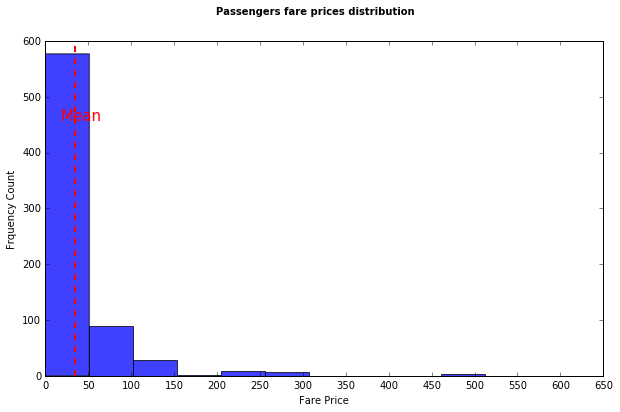

In [127]:
fare_fig = plt.figure(figsize=(10, 6))
fare_fig.suptitle("Passengers fare prices distribution",fontweight='bold')
ax=fare_fig.add_subplot(111)
ax.hist(titanic_df['Fare'],alpha=0.75)
ax.set_xlabel('Fare Price')
ax.set_ylabel('Frquency Count')
ax.set_xticks([0,50,100,150,200,250,300,350,400,450,500,550,600,650])      
ax.text(0.1, 0.8, r'Mean',
        horizontalalignment='right',
        verticalalignment='top',   transform=ax.transAxes, color = 'red' , fontsize='15')

plt.axvline(titanic_df['Fare'].mean(), color='r', linestyle='dashed', linewidth=2)

print "AS we see in the below histogram, the distribution is rightly skewed where the mean is less than 50. Passengers"
print "withfare's value greater than $400 will not be omitted. Because, they represent 1st class passengers info that "
print "we want to explore."
## AS we see in the below histogram, the distribution is rightly skewed where the mean is less than 50. Passengers with
## fare's value greater than $400 will not be omitted. Because, they represent 1st class passengers info that we want 
## to explore.

# Date Exploration 
After cleansing the data, let's explore the data patterns and find the expected relations between variables that answer the following questions:
- Are most survived people males or females?
- What is the sex of the majority of survived people?
- Are 1st class passengers more likely to survive than others?

To answer the questions above: 


In [76]:
## This function will be used in displaying variables statistics
def show_var_mean(df, var):
    print  "The avgerage %s of all femals on board is: %s"% (var,np.around(df[var].mean()))
    print  "The avgerage %s of survived females is: %s"% (var, np.around(df[df['Survived']==1]['Age'].mean()))

Proportion of survived females is 0.754789272031 
Proportion of survived males is 0.205298013245 


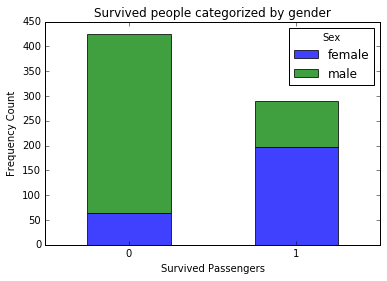

In [94]:
#### First: I will try to find,  is there a relation between the passenger sex and the probability of being survived. 
#plt.bar(titanic_df['Survived'], sex_counts)
#sex_df.plot(kind='bar',title="Passengers' Sex Frequency" )
df_groupedBy_sex = titanic_df.groupby(['Survived','Sex'])['Survived'].count().unstack()
df_groupedBy_sex.plot(kind='bar', stacked=True, title='Survived people categorized by gender',rot=0,alpha=0.75)
plt.xlabel("Survived Passengers")
plt.ylabel("Frequency Count")
females_on_board = df_groupedBy_sex['female'].sum()
males_on_board = df_groupedBy_sex['male'].sum()
females_survived_count= df_groupedBy_sex['female'][1]
males_survived_count = df_groupedBy_sex['male'][1]
proportion_females_survived = float(females_survived_count) / females_on_board
propotion_males_survived = float(males_survived_count) / males_on_board

print "Proportion of survived females is %s " %proportion_females_survived
print "Proportion of survived males is %s " %propotion_males_survived
 

From the above stack bar chart, we can say that females are more likely to survive that males.

Second: After assuming that females are more likely to survive, let's use another variable 'Pclass' and see how it affects the survival probability. 


 -------------females on board: Fare startistics----------
The avgerage Fare of all femals on board is: 48.0
The avgerage Fare of survived females is: 29.0


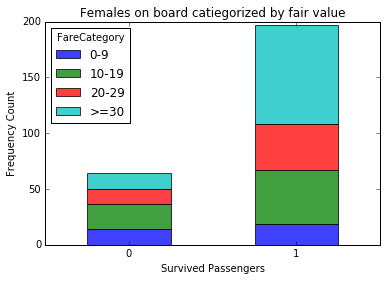

In [93]:
## ----- Exclude the males from the data  and analyze females data only as based on our assumption.
females_on_board_df = titanic_df[titanic_df['Sex']=='female'].copy()
females_on_board_df.reset_index(inplace=True)
females_on_board_df.drop(['index'],inplace=True,axis=1)
#print females_on_board_df.columns.values
#del females_on_board_df(['index'])
#females_on_board_df.count()
## ----- Now split the females record into groups based on fare value
######## The fare will be categorized into 4 categories , $0-$9, $10-$19, $20-$29, >= $30

def generate_fare_category(row):
    if row['Fare'] <= 9:
        return '0-9'
    elif row['Fare'] <= 19:
        return '10-19'
    elif row['Fare'] <= 29:
        return '20-29'
    else:
        return '>=30'
    
females_on_board_df['FareCategory'] = females_on_board_df.apply(generate_fare_category,axis=1)
females_groupBy_fareCat  = females_on_board_df.groupby(['Survived','FareCategory'])['Survived'].count().unstack()
females_groupBy_fareCat.plot(kind='bar',stacked='True', title='Females on board catiegorized by fair value',rot=0,alpha=0.75)
plt.xlabel("Survived Passengers")
plt.ylabel("Frequency Count")
print " -------------females on board: Fare startistics----------"
show_var_mean(females_on_board_df,'Fare')

The average fare value for women on board is $48.0 . Also, the above bar chart shows that the highest proportion of  survived females had paid fare greater than or equal to $30. The values could change if we changed the fare categories ranges.

Third: Let's see the average age for survived females 

------------- Females : Age staitistics----------
The avgerage Age of all femals on board is: 28.0
The avgerage Age of survived females is: 29.0


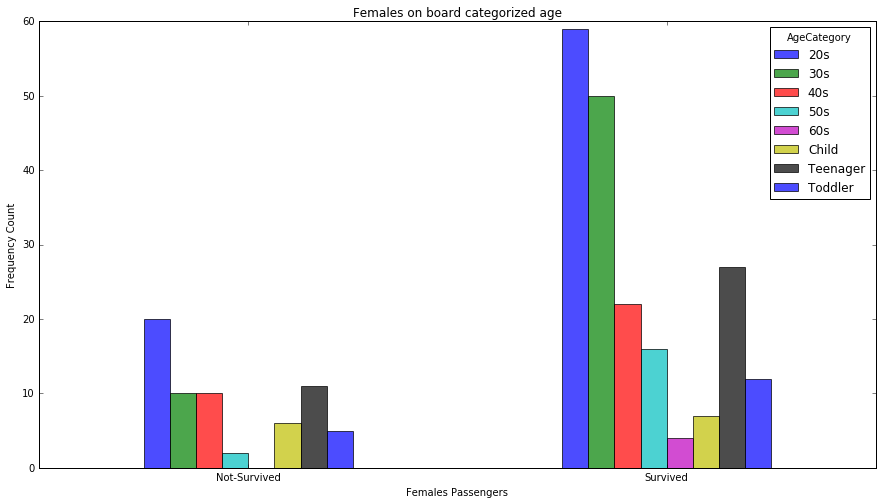

In [96]:
## What is the average age for survived females 
print "------------- Females : Age staitistics----------"
def generate_age_category(row):
    if row['Age'] < 5:
        return 'Toddler'
    elif row['Age'] < 10:
        return 'Child'
    elif row['Age'] < 19:
        return 'Teenager'
    elif row['Age'] <= 29:
        return '20s'
    elif row['Age'] <= 39:
        return '30s'
    elif row['Age'] <= 49:
        return '40s'
    elif row['Age'] <= 59:
        return '50s'
    elif row ['Age'] <= 69:
        return '60s'
    else:
        return '>= 70'

show_var_mean(females_on_board_df,'Age')
females_on_board_df['AgeCategory'] = females_on_board_df.apply(generate_age_category,axis=1)
females_on_board_df.head(n=3)
females_groupby_age = females_on_board_df.groupby(['Survival_Flag','AgeCategory'])['Survival_Flag'].count().unstack()
females_groupby_age.plot(kind='Bar',figsize=(15,8),title="Females on board categorized age",rot=0,alpha=0.7)
plt.xlabel("Females Passengers")
plt.ylabel("Frequency Count")

The average age for all females on board is about 28 years old and the average of age for survived females is 29 years. Also, the above age bar chart shows that most of survived females are in 20s or 30s of age.

# Conclusion:

While exploring the data, some limitations was found such as:
- We don't have all pessengers data, we only have 891 data point out of  2,224.
- Some attributes such as Age & Cabin had missing values.
- Some data points was removed as a result of having missing values which reduce our data points to 714 data point.

After analyzing  Titanic data set of 714 data point, we can conclude that:
- The women are more likely to survive than men as survived women percent is greater than the men percent.
- The main characteristics for survived women:
    -they are more likely to be in 20s and 30's of age
    -they are More likely to pay fair around $29 

Note: We can apply the same analysis on men, also we can include more independent variables such as the passengers class or where they embarked. 

References:
https://www.kaggle.com/c/titanic/details/getting-started-with-python
